## Distribuciones en forma de anillo 

In [5]:
from math import sin,cos,radians,pi,sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def ring(r_min = 0, r_max = 1,n_samples = 360):
    angle = rnd.uniform(0,2*pi,n_samples)
    distance = rnd.uniform(r_min,r_max,n_samples)
    data =[]
    for a,d in zip(angle,distance):
        data.append([d*cos(a),d*sin(a)])
    return np.array(data)

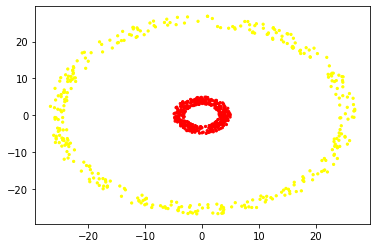

In [9]:
data1 = ring(3,5)
data2 = ring(24,27)
data = np.concatenate([data1,data2],axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))],[1 for i in range(0,len(data2))]])
plt.scatter(data[:,0],data[:,1],c= labels,s = 5, cmap = 'autumn')

## Algoritmo Kmeans

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(2).fit(data)

In [13]:
clust = km.predict(data)

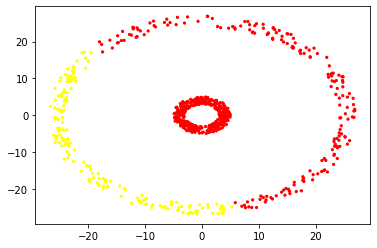

In [14]:
plt.scatter(data[:,0],data[:,1],c= clust,s = 5,cmap= 'autumn') #K means no funciona, no disitingue entre el anillo interior/anillo exterior

### Algoritmo de los K Medoides

In [17]:
from pyclust import KMedoids

In [19]:
km = KMedoids(2).fit_predict(data)

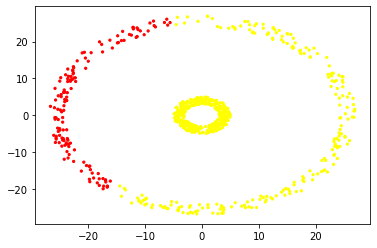

In [21]:
plt.scatter(data[:,0],data[:,1],c = km ,s=5,cmap = 'autumn')

# Algoritmo del Clustering espectral

In [22]:
from sklearn.cluster import SpectralClustering

In [23]:
clust = SpectralClustering(2).fit_predict(data)

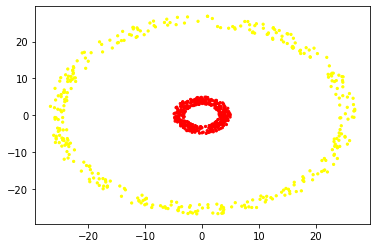

In [25]:
plt.scatter(data[:,0],data[:,1],c =clust,s = 5,cmap = 'autumn')

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemosar usar la distancia Euclidea:
        * Si: K means
        * No: Buscar valores centrales:
            * Si: K-Medoides
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral